<a href="https://colab.research.google.com/github/erwincarlogonzales/CodingDojo/blob/main/Neural_Networks_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
# load data
filename = '/content/drive/MyDrive/Colab Notebooks/nba.csv'
df = pd.read_csv(filename, index_col = 'Name')
df.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
Name,,,,,,,,,,,,,,,,,,,,
Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


Data Cleaning

In [4]:
# drop missing values
df.dropna(inplace = True)

Preprocessing

In [5]:
# determine target y and features X
X = df.drop(columns = 'TARGET_5Yrs')
y = df['TARGET_5Yrs']
X.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
Name,,,,,,,,,,,,,,,,,,,
Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3
Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6
JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0
Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0
Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8


In [6]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3)

In [7]:
# scale the data
scaler = StandardScaler()

# fit and transform features X
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 1. Define our network structure

The first thing we need to define is how many features we have in our X data. This will be used in our first hidden layer, in which we have to tell Keras how many features to be expecting from our input layer.

In [8]:
# define network structure
# save the number of features as our input shape
input_shape = X_train.shape[1]
input_shape

19

In [9]:
# define model type
# model layers are run sequentially. This is a very common type of model to use in Keras.
model = Sequential()

In [10]:
# add first hidden layer
model.add(Dense(19, # how many neurons you have in your first hidden layer
                input_dim = input_shape, # how many number of cols or features
                activation = 'relu')) # what activation function are you using

# add second hidden layer
model.add(Dense(10, activation = 'relu'))

# add output layer
model.add(Dense(1, activation = 'sigmoid'))

# Step 2. Compile the model

When compiling our model, we need to specify which loss function we are using and what optimizer we will use to fit. A common optimizer to choose is the Adam optimizer.

For regression problems, we would want to use a loss function like MSE.

For binary classification problems like this one, we want to use the binary cross-entropy loss. This can be abbreviated as "bce" in Keras.

For multiclass classification problems, we would use categorical cross-entropy.

In [11]:
# compile the model
model.compile(loss = 'bce', optimizer = 'adam')

# Step. 3 Fit the model

 save the fitting process so we can visualize our loss over time.

In [12]:
# fit the model
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=10) # an epoch is the number of times our model with run through the training data back and forth

Epoch 1/10
32/32 [==============================] - 2s 26ms/step - loss: 0.7236 - val_loss: 0.6929
Epoch 2/10
32/32 [==============================] - 0s 12ms/step - loss: 0.6718 - val_loss: 0.6521
Epoch 3/10
32/32 [==============================] - 0s 8ms/step - loss: 0.6449 - val_loss: 0.6279
Epoch 4/10
32/32 [==============================] - 0s 9ms/step - loss: 0.6256 - val_loss: 0.6088
Epoch 5/10
32/32 [==============================] - 0s 11ms/step - loss: 0.6144 - val_loss: 0.5963
Epoch 6/10
32/32 [==============================] - 0s 9ms/step - loss: 0.6078 - val_loss: 0.5918
Epoch 7/10
32/32 [==============================] - 0s 10ms/step - loss: 0.6026 - val_loss: 0.5877
Epoch 8/10
32/32 [==============================] - 0s 9ms/step - loss: 0.5982 - val_loss: 0.5827
Epoch 9/10
32/32 [==============================] - 0s 10ms/step - loss: 0.5925 - val_loss: 0.5787
Epoch 10/10
32/32 [==============================] - 0s 6ms/step - loss: 0.5862 - val_loss: 0.5739


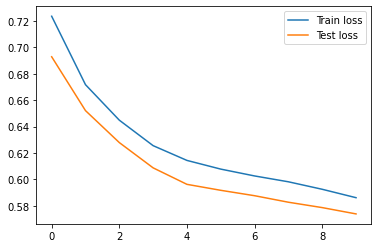

In [13]:
# visualize the loss
plt.plot(history.history['loss'], label = 'Train loss')
plt.plot(history.history['val_loss'], label = 'Test loss')
plt.legend();